
### Detecting customer churn project

Determining customer churn
One of the most common problems in business. Determining the mood of the client.

If the business owner can predict in advance that the customer will not return, will not use the product or service again, he can act to retain the customer and change his mind.

In this practice, we predict whether a customer will stay or not by analyzing the data of online store customers.

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## Reading data


In [4]:
df = pd.read_csv("E-Commerce-Dataset.csv")

df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [5]:
df.shape

(5630, 20)

## EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

- The number of rows is 5630
- Some columns have dropped values

In [7]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [8]:
df.describe(include="all")

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630,5630.000000,5379.000000,5630,5630,5375.000000,5630.000000,5630,5630.000000,5630,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
unique,NaN,NaN,NaN,3,NaN,NaN,7,2,NaN,NaN,6,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Mobile Phone,NaN,NaN,Debit Card,Male,NaN,NaN,Laptop & Accessory,NaN,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,2765,NaN,NaN,2314,3384,NaN,NaN,2050,NaN,2986,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,52815.500000,0.168384,10.189899,NaN,1.654707,15.639896,NaN,NaN,2.931535,3.688988,NaN,3.066785,NaN,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,NaN,0.915389,8.531475,NaN,NaN,0.721926,1.023999,NaN,1.380194,NaN,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,NaN,1.000000,5.000000,NaN,NaN,0.000000,1.000000,NaN,1.000000,NaN,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,NaN,1.000000,9.000000,NaN,NaN,2.000000,3.000000,NaN,2.000000,NaN,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,NaN,1.000000,14.000000,NaN,NaN,3.000000,4.000000,NaN,3.000000,NaN,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,NaN,3.000000,20.000000,NaN,NaN,3.000000,4.000000,NaN,4.000000,NaN,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000


In [9]:
df['Churn'].value_counts()/len(df)*100

0    83.161634
1    16.838366
Name: Churn, dtype: float64

- 4682 customers repurchased (remaining)
- 948 customers left

We derive the ratio:

In [10]:
churn_rate = df['Churn'].value_counts()/len(df)*100

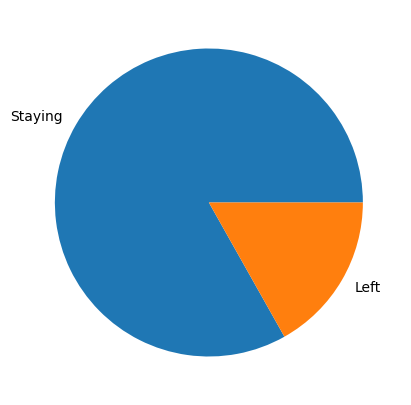

In [11]:
plt.figure(figsize=(5,5))
plt.pie(churn_rate, labels=['Staying','Left'])
plt.show()

#### Analyzing some numerical columns

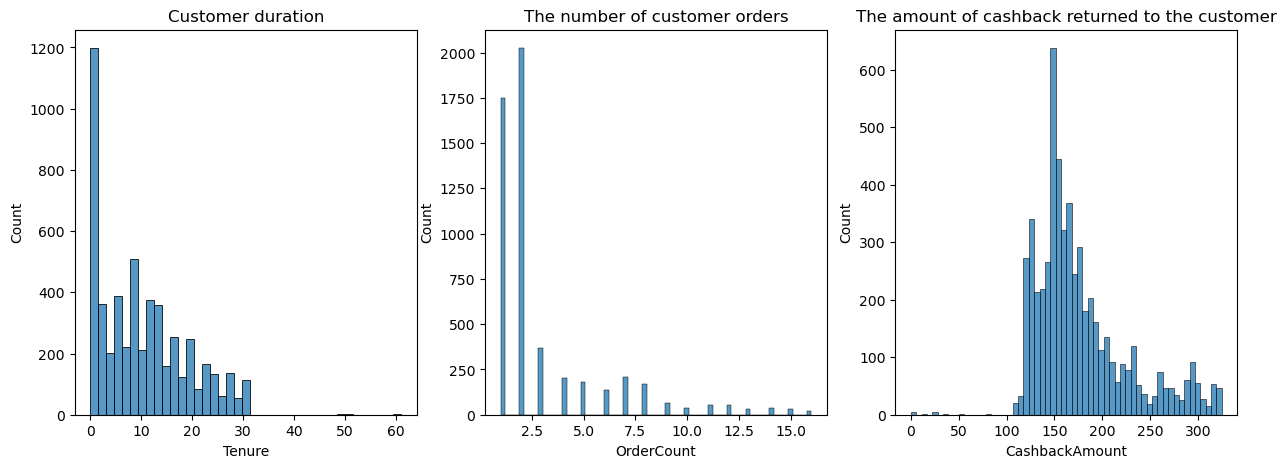

In [12]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

# Tenure
sns.histplot(x="Tenure", data=df, ax=axes[0])
axes[0].set_title("Customer duration")

#OrderCount
sns.histplot(x="OrderCount", data=df, ax=axes[1])
axes[1].set_title("The number of customer orders")

# Cashback
sns.histplot(x="CashbackAmount", data=df, ax=axes[2])
axes[2].set_title("The amount of cashback returned to the customer")

plt.show()

#### Analyzing categorical data

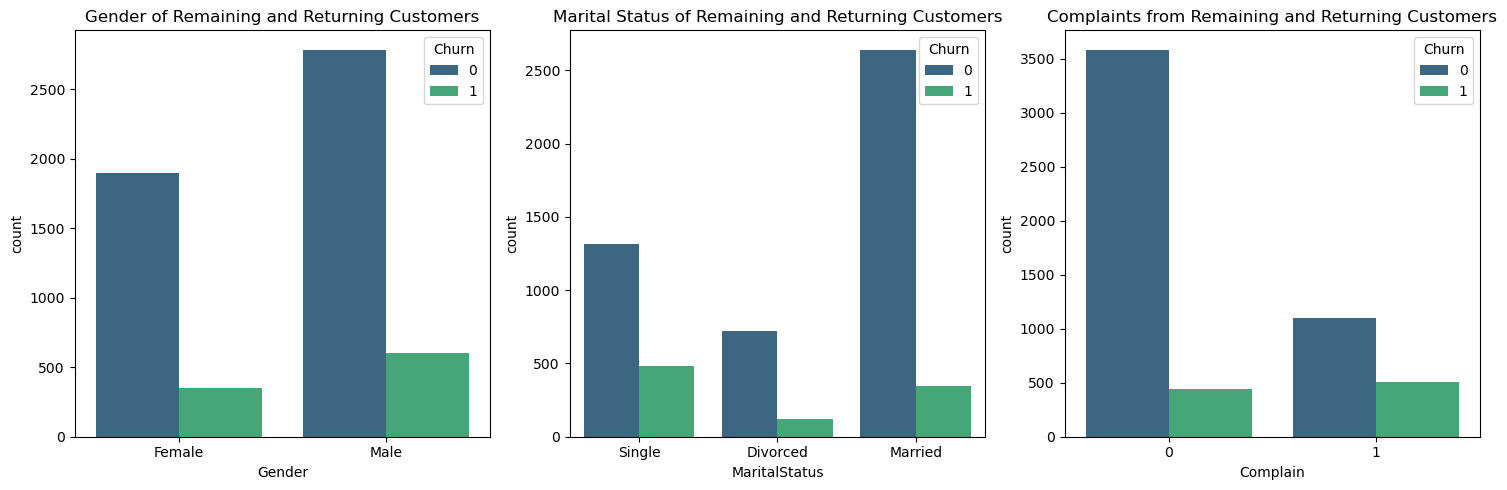

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.countplot(x='Gender', hue='Churn', palette='viridis', data=df, ax=axes[0])
axes[0].set_title("Gender of Remaining and Returning Customers")

sns.countplot(x='MaritalStatus', hue='Churn', palette='viridis', data=df, ax=axes[1])
axes[1].set_title("Marital Status of Remaining and Returning Customers")

sns.countplot(x='Complain', hue='Churn', palette='viridis', data=df, ax=axes[2])
axes[2].set_title("Complaints from Remaining and Returning Customers")

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

In [14]:
df.corrwith(df['Churn'], numeric_only=True).abs().sort_values(ascending=False)


Churn                          1.000000
Tenure                         0.349408
Complain                       0.250188
DaySinceLastOrder              0.160757
CashbackAmount                 0.154161
NumberOfDeviceRegistered       0.107939
SatisfactionScore              0.105481
CityTier                       0.084703
WarehouseToHome                0.076630
NumberOfAddress                0.043931
OrderCount                     0.028697
CustomerID                     0.019083
HourSpendOnApp                 0.018675
OrderAmountHikeFromlastYear    0.010058
CouponUsed                     0.008264
dtype: float64

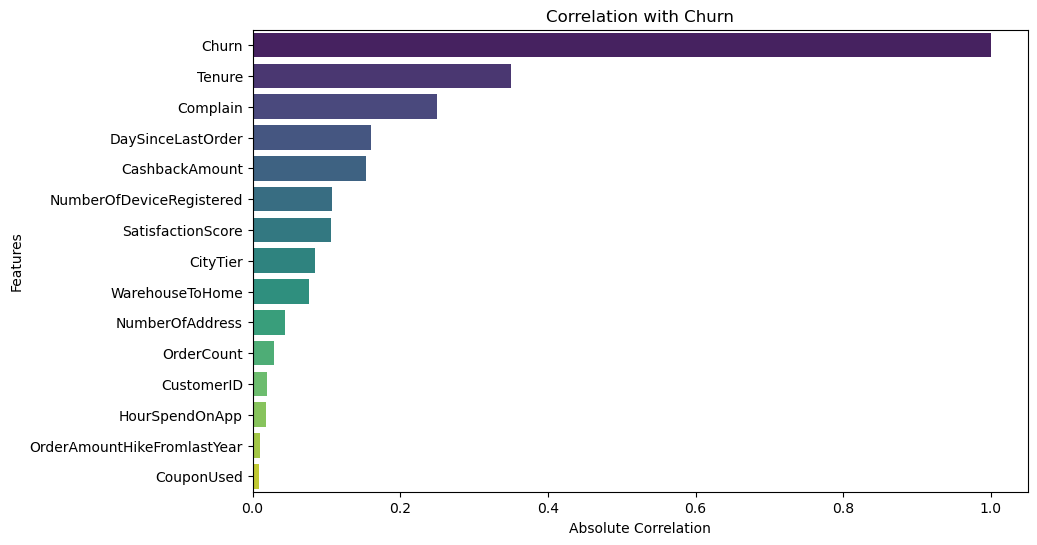

In [15]:
correlation = df.corrwith(df['Churn'], numeric_only=True).abs().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation.values, y=correlation.index, palette='viridis')
plt.title('Correlation with Churn')
plt.xlabel('Absolute Correlation')
plt.ylabel('Features')
plt.show()


Based on the correlation values, here are some observations and conclusions about the data:

'Tenure' (0.349408) has the highest positive correlation with 'Churn'. This indicates that customers with a shorter tenure are more likely to churn, meaning they are more likely to stop using the service.

'Complain' (0.250188) has a moderately positive correlation with 'Churn'. Customers who have registered complaints are more likely to churn compared to those who haven't.

'DaySinceLastOrder' (0.160757) and 'CashbackAmount' (0.154161) have relatively moderate positive correlations with 'Churn'. Customers who have a longer duration since their last order or have a higher cashback amount are more likely to churn.

'NumberOfDeviceRegistered' (0.107939) and 'SatisfactionScore' (0.105481) also have positive correlations with 'Churn', although they are relatively weaker compared to other variables.

'CityTier' (0.084703) and 'WarehouseToHome' (0.076630) have positive correlations with 'Churn', indicating that customers from higher city tiers or with longer distances from the warehouse to their home are slightly more likely to churn.

'NumberOfAddress' (0.043931), 'OrderCount' (0.028697), 'CustomerID' (0.019083), 'HourSpendOnApp' (0.018675), 
'OrderAmountHikeFromlastYear' (0.010058), and 'CouponUsed' (0.008264) have very weak positive correlations with 'Churn', suggesting that they have minimal impact on customer churn.

## Data processing

In [16]:
print(f"The number of non-existent values: {df.isnull().sum().sum()}")
missing_rows = df[df.isnull().any(axis=1)].shape[0]
print(f"The number of rows that do not exist: {missing_rows}")

print(f"Non-existent rows %: {np.round(missing_rows/len(df)*100)}%")

The number of non-existent values: 1856
The number of rows that do not exist: 1856
Non-existent rows %: 33.0%


Let's sort some categorical (relevant) columns with high correlation.

In [17]:
data = df[['Churn','Tenure','Complain','DaySinceLastOrder','CashbackAmount','MaritalStatus','Gender']]

In [18]:
print(f"Number of null values: {data.isnull().sum().sum()}")
#number of missing rows
missing_rows = data[data.isnull().any(axis=1)].shape[0]
print(f"Number of missing rows: {missing_rows}")
#row ratio
print(f"Missing rows %: {np.round(missing_rows/len(data)*100)}%")

Number of null values: 571
Number of missing rows: 571
Missing rows %: 10.0%


In [19]:
data = data.dropna()
data.shape

(5059, 7)

In [20]:
data['Churn'].value_counts()/len(data)

0    0.839296
1    0.160704
Name: Churn, dtype: float64

## Preparation for ML

In [21]:
# Changing categorical data to numerical 
encoded = pd.get_dummies(data)
encoded.head()

,Churn,Tenure,Complain,DaySinceLastOrder,CashbackAmount,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Gender_Female,Gender_Male
0,1,4.0,1,5.0,160,0,0,1,1,0
3,1,0.0,0,3.0,134,0,0,1,0,1
4,1,0.0,0,3.0,130,0,0,1,0,1
5,1,0.0,1,7.0,139,0,0,1,1,0
8,1,13.0,1,2.0,127,1,0,0,0,1


In [22]:
X = encoded.drop("Churn", axis=1)
y = encoded['Churn']

In [23]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [24]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

## MODEL SELECTION

### Logistic Regression

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       849
           1       0.75      0.38      0.50       163

    accuracy                           0.88      1012
   macro avg       0.82      0.68      0.72      1012
weighted avg       0.87      0.88      0.86      1012

Model accuracy: 0.8794466403162056


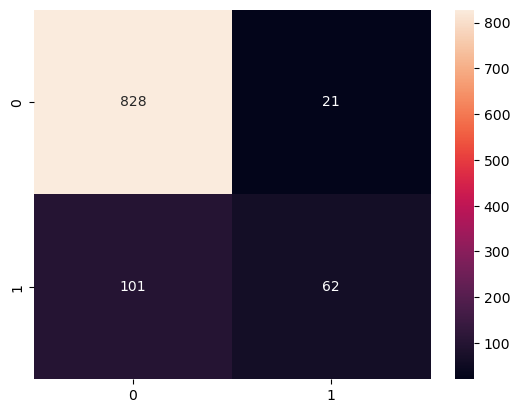

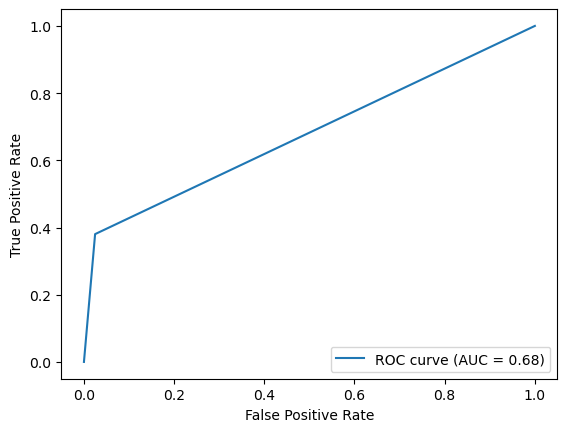

In [25]:
# Building model (training)
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

# Evaluating the model
y_pred = LR_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model accuracy:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

### Support Vector Machines

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       849
           1       0.67      0.31      0.42       163

    accuracy                           0.86      1012
   macro avg       0.77      0.64      0.67      1012
weighted avg       0.85      0.86      0.84      1012

Model accuracy: 0.8636363636363636


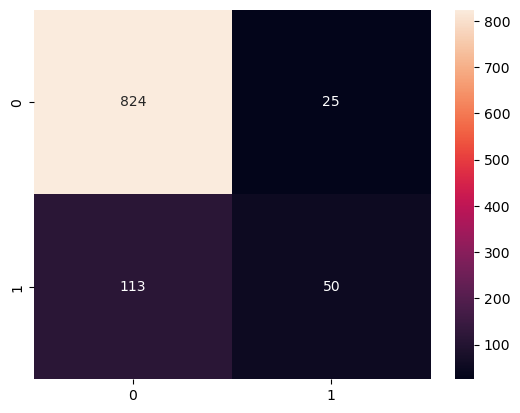

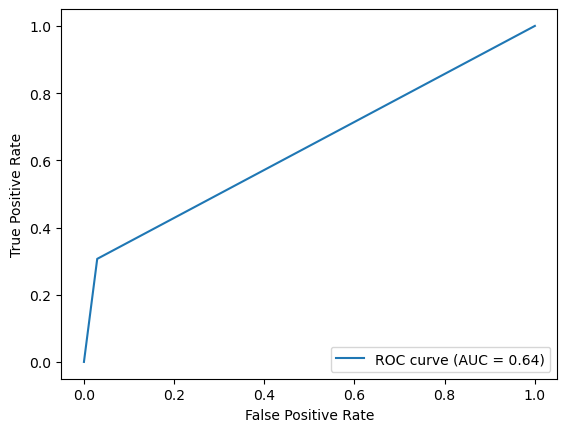

In [26]:
# Building model (training)

svm_model = SVC()
svm_model.fit(X_train, y_train)

# Evaluating the model
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model accuracy:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

### Decision Tree

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       849
           1       0.83      0.85      0.84       163

    accuracy                           0.95      1012
   macro avg       0.90      0.91      0.90      1012
weighted avg       0.95      0.95      0.95      1012

Model accuracy: 0.9476284584980237


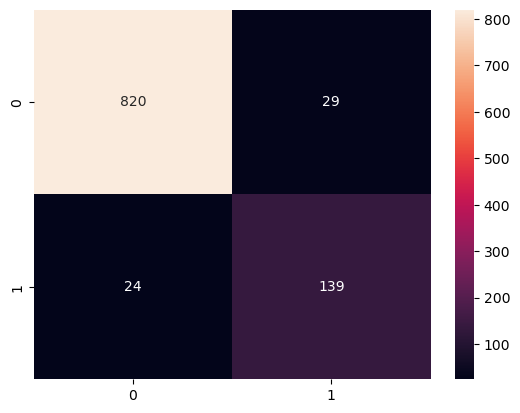

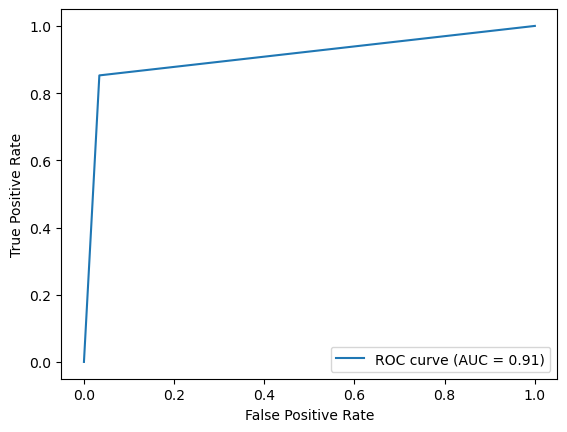

In [27]:
# Building the model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Evaluating the model
y_pred = tree_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model accuracy:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

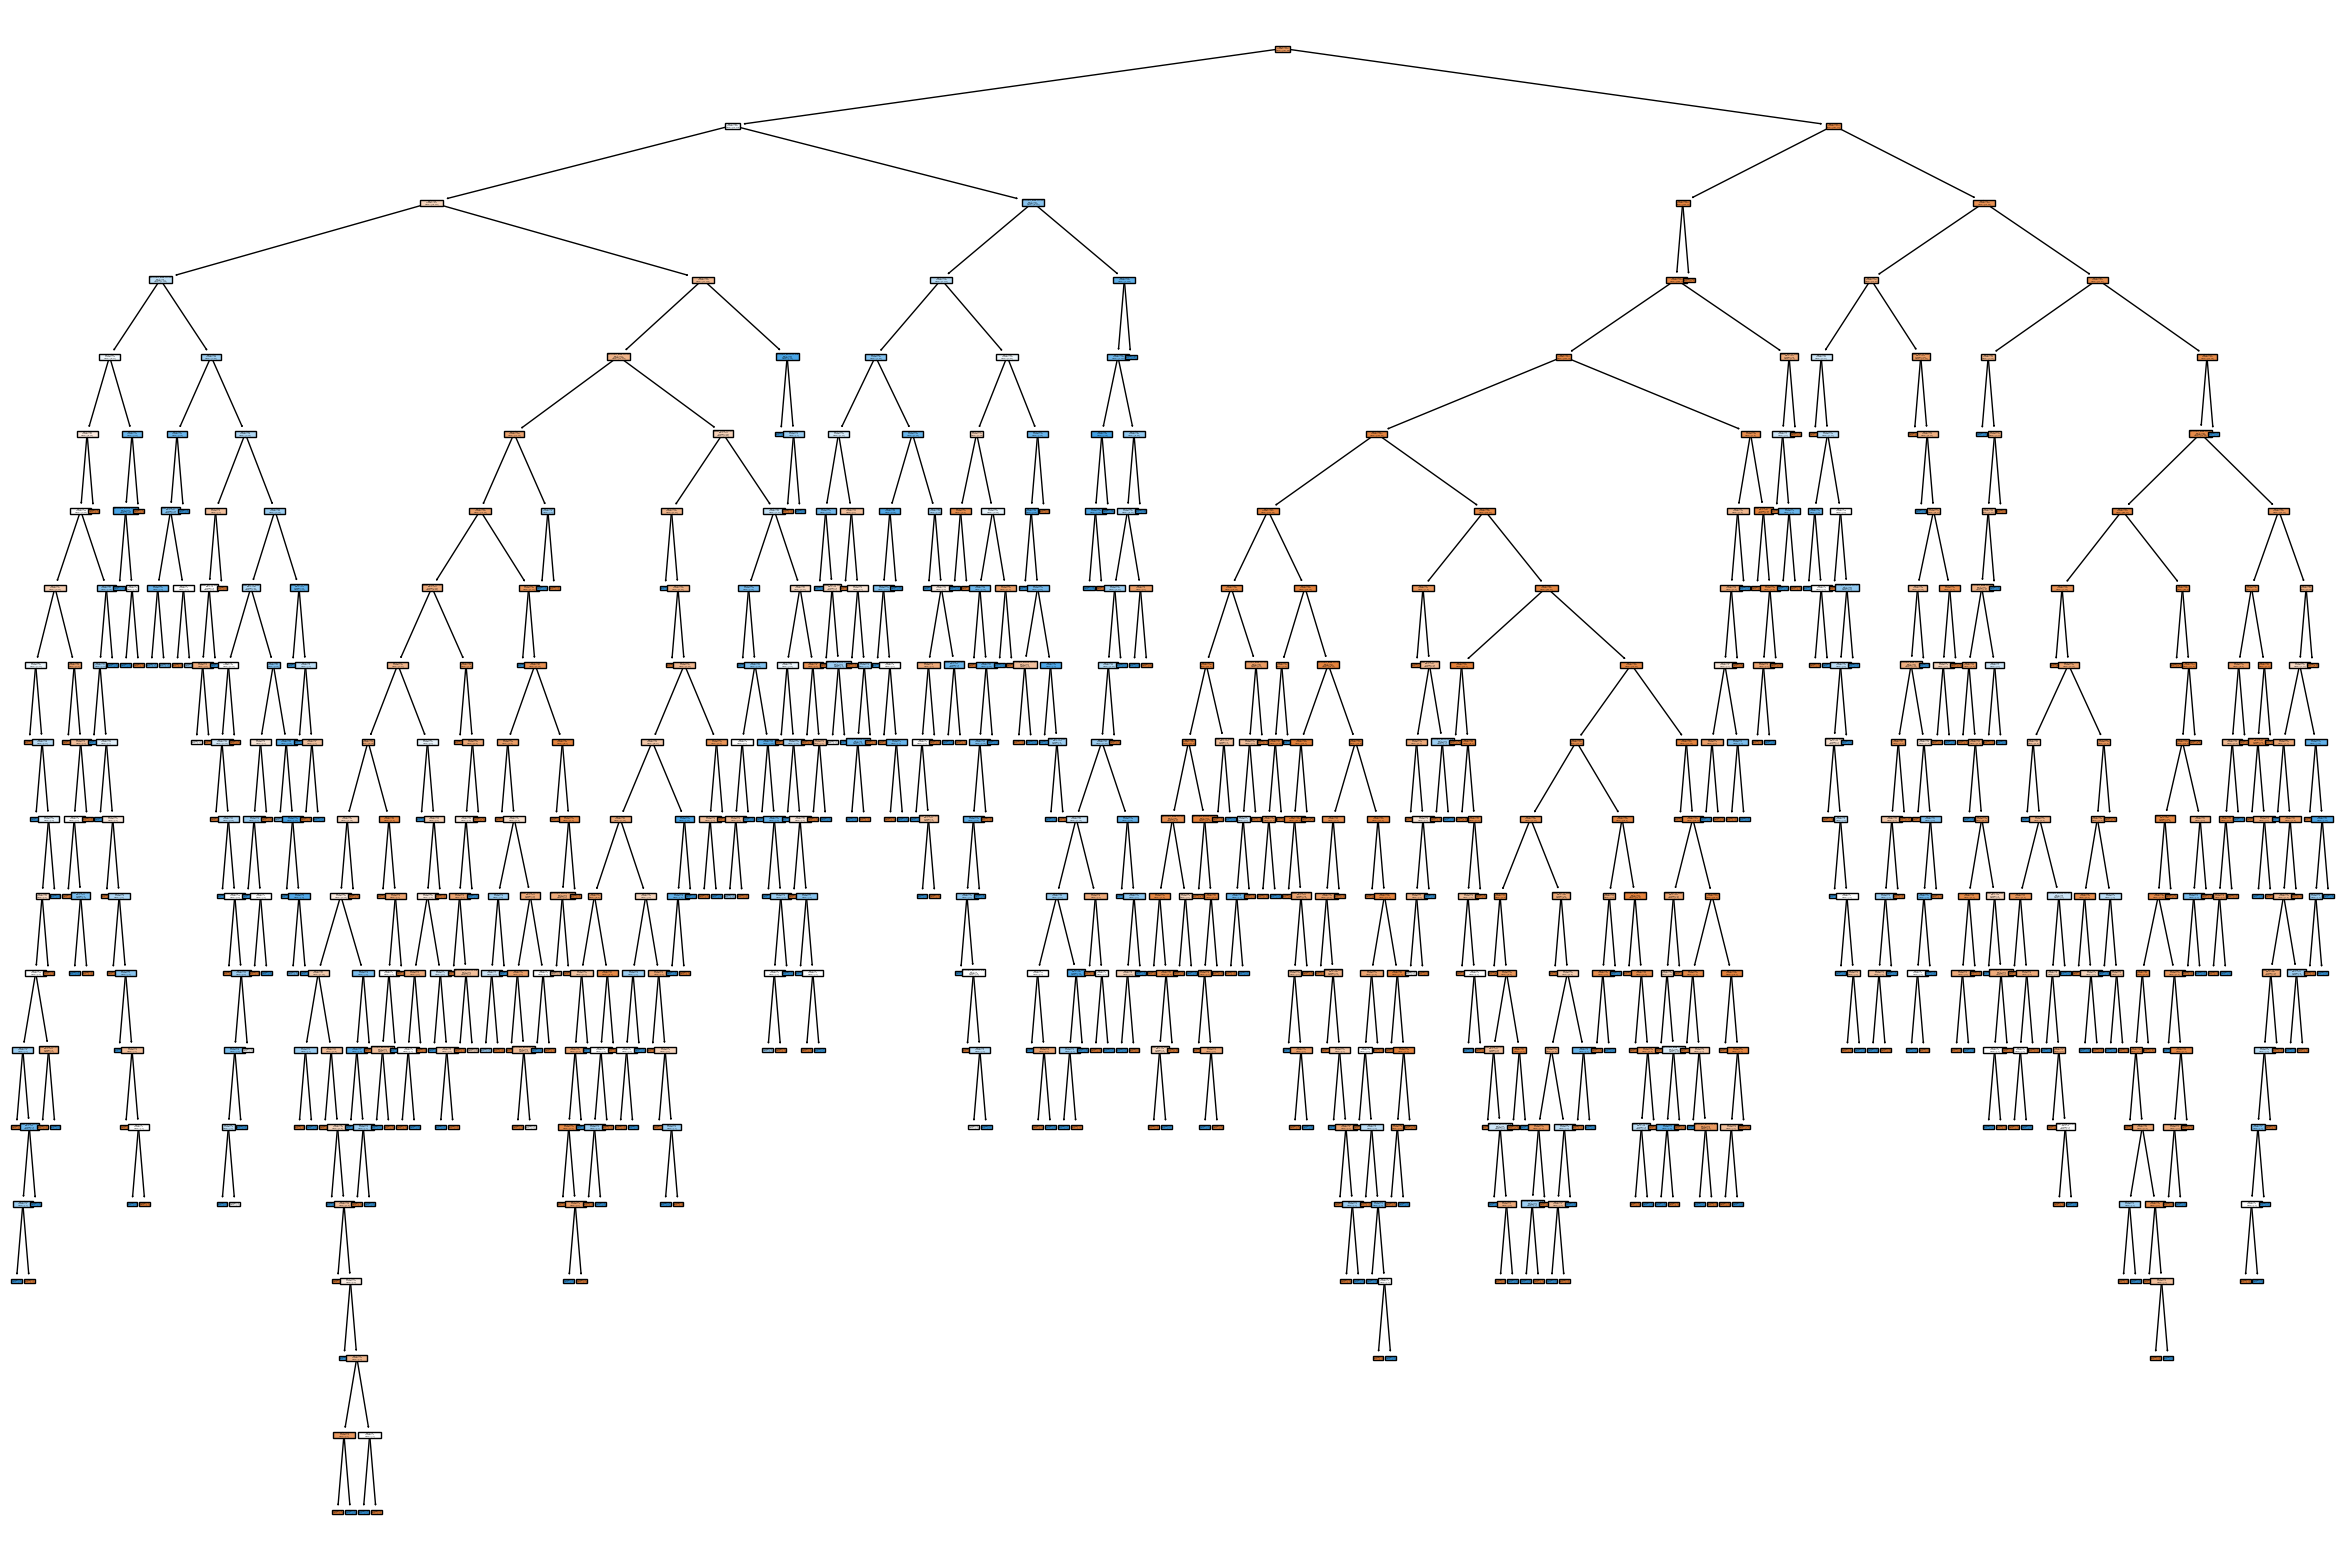

In [28]:
cols = encoded.drop('Churn', axis=1).columns

plt.figure(figsize=(30,20))
plot_tree(tree_model, feature_names=cols, filled=True)
plt.show()

### Random Forest

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       849
           1       0.80      0.77      0.79       163

    accuracy                           0.93      1012
   macro avg       0.88      0.87      0.87      1012
weighted avg       0.93      0.93      0.93      1012

Model accuracy: 0.9318181818181818


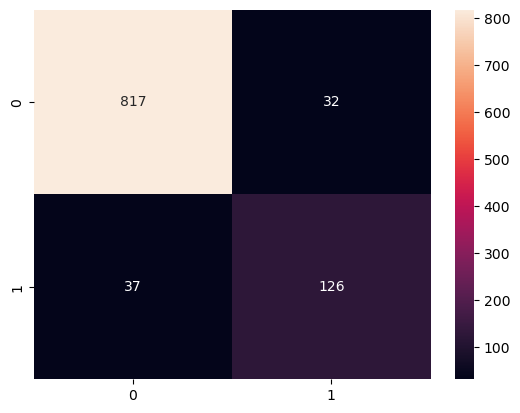

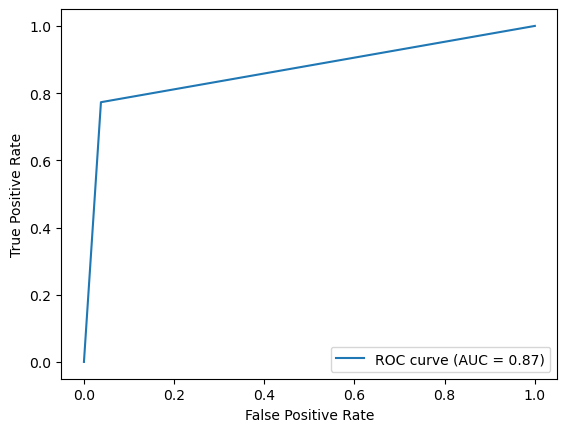

In [29]:
# Building the model (training)
RF_model = RandomForestClassifier(n_estimators=9)
RF_model.fit(X_train, y_train)

# Evaluation
y_pred = RF_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model accuracy:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

### XGBoost

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       849
           1       0.80      0.73      0.77       163

    accuracy                           0.93      1012
   macro avg       0.88      0.85      0.86      1012
weighted avg       0.93      0.93      0.93      1012

Model accuracy: 0.9278656126482213


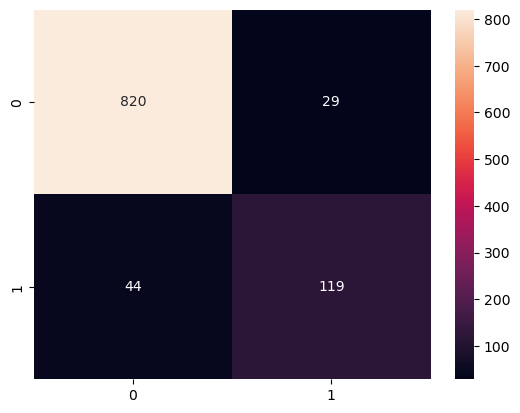

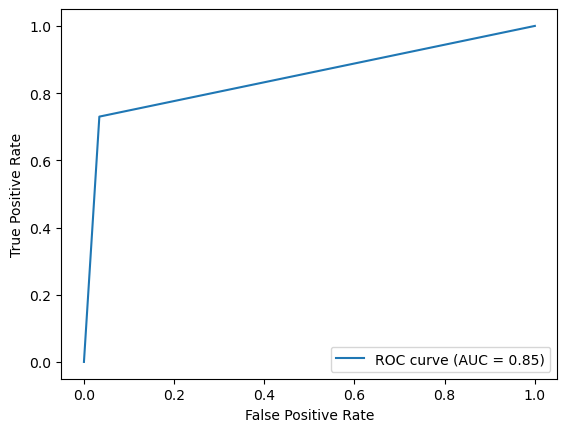

In [30]:
# Creating the model (training)
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Evaluation
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model accuracy:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

Overall, based on the provided classification report, the decision tree model demonstrates strong performance, with high precision, recall, and F1-score for both classes. The accuracy of 0.95 suggests that the model is effective in making correct predictions for the majority of instances in the dataset.